In [1]:
import sys
import os
from pathlib import Path
from collections import defaultdict
import numpy as np
import matplotlib.pyplot as plt

os.chdir('..')

from utils.meta_util import load_meta_infos, collect_by, filter_by
from utils.tensor_holders import TensorHolder
from utils.plot_util import plot, legend
from utils.np_util import step_with_end

plot_dir = Path('results')
losses_label = '$mc_estimator$ $sample_size$ sample(s)'

ecg_results = load_meta_infos(Path('results', 'vaernn', 'ecg5000'))

# Plot VAE Losses

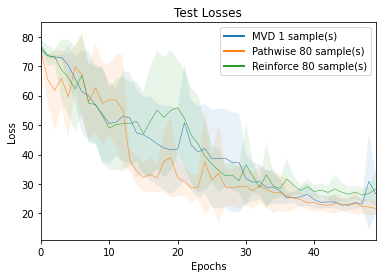

In [2]:
test_losses = defaultdict(list)
for k, v in collect_by(ecg_results, 'mc_estimator', 'sample_size').items():
    for meta in v:
        test_losses[k].append((meta, TensorHolder.load(meta['results_dir'], 'test_loss')))
test_losses.default_factory = None

step_size = 1
max_len = 0
for run in test_losses.values():
    meta, _ = run[0]
    losses = []
    if meta['sample_size'] < 80 and meta['mc_estimator'] != 'MVD':
        continue
    for meta, loss in run:
        losses.append(loss.data.numpy().flatten())
    indices, losses = step_with_end(np.array(losses), step_size)
    plot(losses.mean(axis=0), losses.std(axis=0), losses_label, meta, xspace=indices)
    max_len = max(max_len, indices[-1])

legend()
plt.xlim(0, max_len)
#plt.ylim(10, 150)
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.title('Test Losses')
plt.savefig(plot_dir / f'vae_ecg5000_test_losses.pdf')
plt.show()

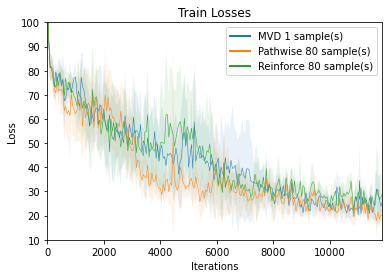

In [3]:
test_losses = defaultdict(list)
for k, v in collect_by(ecg_results, 'mc_estimator', 'sample_size').items():
    for meta in v:
        test_losses[k].append((meta, TensorHolder.load(meta['results_dir'], 'train_loss')))
test_losses.default_factory = None

step_size = 50
max_len = 0
for run in test_losses.values():
    meta, _ = run[0]
    losses = []
    if meta['sample_size'] < 80 and meta['mc_estimator'] != 'MVD':
        continue
    for meta, loss in run:
        losses.append(loss.data.numpy().flatten())
    indices, losses = step_with_end(np.array(losses), step_size)
    plot(losses.mean(axis=0), losses.std(axis=0), losses_label, meta, xspace=indices)
    max_len = max(max_len, indices[-1])

legend()
plt.ylim(10, 100)
plt.xlim(0, max_len)
plt.ylabel('Loss')
plt.xlabel('Iterations')
plt.title('Train Losses')
plt.savefig(plot_dir / f'vae_ecg5000_train_losses.pdf')
plt.show()

# Plot VAE Train Losses by process time

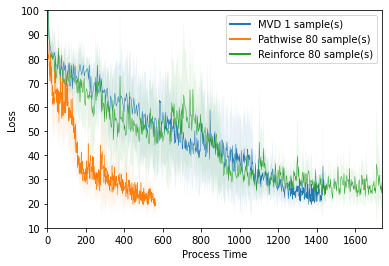

In [5]:
train_losses = defaultdict(list)
for k, v in collect_by(ecg_results, 'mc_estimator', 'sample_size').items():
    for meta in v:
        train_losses[k].append((meta, TensorHolder.load(meta['results_dir'], 'train_loss'), TensorHolder.load(meta['results_dir'], 'iteration_times')))
train_losses.default_factory = None

step_size = 20
max_len = 0
for run in train_losses.values():
    meta = run[0][0]
    losses = []
    timestamps = []
    if meta['sample_size'] < 80 and meta['mc_estimator'] != 'MVD':
        continue
    for meta, loss, timestamp in run:
        losses.append(loss.data.numpy().flatten())
        timestamps.append(timestamp.data.numpy().flatten())
    indices, losses = step_with_end(np.array(losses), step_size)
    _, timestamps = step_with_end(np.array(timestamps).mean(axis=0), step_size)
    plot(losses.mean(axis=0), losses.std(axis=0), losses_label, meta, xspace=timestamps)
    max_len = max(max_len, timestamps[-1])

legend()
plt.xlabel('Process Time')
plt.ylabel('Loss')
plt.ylim(10, 100)
plt.xlim(0, max_len)
plt.savefig(plot_dir / f'vae_ecg5000_train_timed_losses_until_end.pdf')
plt.show()

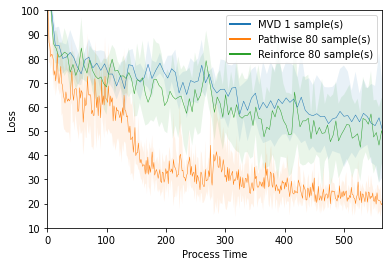

In [6]:
test_losses = defaultdict(list)
for k, v in collect_by(ecg_results, 'mc_estimator', 'sample_size').items():
    for meta in v:
        test_losses[k].append((meta, TensorHolder.load(meta['results_dir'], 'train_loss'), TensorHolder.load(meta['results_dir'], 'iteration_times')))
test_losses.default_factory = None

step_size = 30
shortest_run = float('inf')
for run in test_losses.values():
    meta = run[0][0]
    losses = []
    timestamps = []
    if meta['sample_size'] < 80 and meta['mc_estimator'] != 'MVD':
        continue
    for meta, loss, timestamp in run:
        losses.append(loss.data.numpy().flatten())
        timestamps.append(timestamp.data.numpy().flatten())
    indices, losses = step_with_end(np.array(losses), step_size)
    _, timestamps = step_with_end(np.array(timestamps).mean(axis=0), step_size)
    plot(losses.mean(axis=0), losses.std(axis=0), losses_label, meta, xspace=timestamps)
    shortest_run = min(shortest_run, timestamps[-1])

legend()
plt.xlabel('Process Time')
plt.ylabel('Loss')
plt.ylim(10, 100)
if test_losses.values():
    plt.xlim(0, shortest_run)
plt.savefig(plot_dir / f'vae_ecg5000_train_timed_losses.pdf')
plt.show()

# Variances

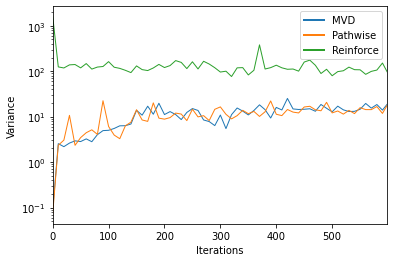

In [13]:
estimator_stds = defaultdict(list)
for k, v in collect_by(ecg_results, 'mc_estimator').items():
    for meta in v:
        try:
            stds = TensorHolder.load(meta['results_dir'], 'estimator_stds')
            estimator_stds[k].append((meta, stds))
        except FileNotFoundError:
            continue
estimator_stds.default_factory = None

step_size = 10
max_len = 0
for run in estimator_stds.values():
    meta, _ = run[0]
    stds = []
    if meta['sample_size'] < 80 and meta['mc_estimator'] != 'MVD':
        continue
    for meta, std in run:
        stds.append(std.data.numpy().flatten())
    indices, stds = step_with_end(np.array(stds), step_size)
    vars_ = (stds**2).mean(axis=0)
    plot(vars_, np.zeros_like(vars_), '$mc_estimator$', meta, xspace=indices, linewidth=1)
    max_len = max(max_len, indices[-1])

legend()
plt.yscale('log')
plt.ylabel('Variance')
plt.xlabel('Iterations')
plt.xlim(0, max_len)
plt.savefig(plot_dir / f'ecg5000_variances.pdf')
plt.show()

In [8]:
test_losses = defaultdict(list)
for k, v in collect_by(ecg_results, 'mc_estimator', 'sample_size').items():
    for meta in v:
        test_losses[k].append((meta, TensorHolder.load(meta['results_dir'], 'test_loss')))
test_losses.default_factory = None

for run in test_losses.values():
    meta, _ = run[0]
    losses = np.array([l.data.numpy().flatten() for _, l in run])
    stds = losses.std(axis=0)
    print(f"{meta['mc_estimator']} {meta['sample_size']} \t\t {stds.mean():.3f} mean std loss \t {stds.std():.3f} std std loss")

MVD 1 		 9.369 mean std loss 	 6.139 std std loss
Pathwise 1 		 8.128 mean std loss 	 4.658 std std loss
Pathwise 20 		 9.971 mean std loss 	 6.081 std std loss
Pathwise 80 		 7.359 mean std loss 	 4.750 std std loss
Reinforce 10 		 9.452 mean std loss 	 6.268 std std loss
Reinforce 40 		 7.869 mean std loss 	 5.013 std std loss
Reinforce 80 		 9.174 mean std loss 	 6.146 std std loss
